<a href="https://colab.research.google.com/github/nmorales5/python-essential-training-4314028/blob/main/Lab16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <a href="https://colab.research.google.com/github/LMU-CMSI-1010/lab-notebooks-original/blob/main/Lab16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 16 Making your own histogram class
While `numpy` and `pandas` will certainly make histograms for you, let's try to make our own from real data to help review classes and dictionaries. We'll use `numpy` to help us plot them. We'll also gain a much greater appreciation for what these data science modules do for us. First, let's import the `datascience`, `numpy`, and `matplotlib` modules to use.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-1-613b5badc5a0>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Reading in Farmers Markets Table

The table `farmers_markets.csv` contains data on farmers' markets in the United States  (data collected [by the USDA](https://apps.ams.usda.gov/FarmersMarketsExport/ExcelExport.aspx)).  Each row represents one such market.

**Run the next cell to load the `farmers_markets` table.**

In [2]:
source = 'https://raw.githubusercontent.com/data-8/materials-fa19/master/materials/fa19/lab/lab02/farmers_markets.csv'
farmers_markets = Table.read_table(source)

# Let's show some information about the data we just loaded.
print("This table has ", farmers_markets.num_rows, "rows. One for each farmer's market")
print("This table has ", farmers_markets.num_columns, "columns")

# We'll only use the first 9, so we'll select them
farmers_markets = farmers_markets.select(range(9))
print("Here are the column labels: \n ", farmers_markets.labels)

# The column label FMID stands for Farmer's Market ID
# The column x stands for longitude
# The column y stands for latitude
# Remember you can view part of the table by using show(number of rows)
farmers_markets.show(5)

This table has  8546 rows. One for each farmer's market
This table has  59 columns
Here are the column labels: 
  ('FMID', 'MarketName', 'street', 'city', 'County', 'State', 'zip', 'x', 'y')


FMID,MarketName,street,city,County,State,zip,x,y
1012063,Caledonia Farmers Market Association - Danville,nan,Danville,Caledonia,Vermont,05828,-72.1403,44.411
1011871,Stearns Homestead Farmers' Market,6975 Ridge Road,Parma,Cuyahoga,Ohio,44130,-81.7286,41.3751
1011878,100 Mile Market,507 Harrison St,Kalamazoo,Kalamazoo,Michigan,49007,-85.5749,42.296
1009364,106 S. Main Street Farmers Market,106 S. Main Street,Six Mile,nan,South Carolina,29682,-82.8187,34.8042
1010691,10th Steet Community Farmers Market,10th Street and Poplar,Lamar,Barton,Missouri,64759,-94.2746,37.4956


To get all the farmer's markets in Los Angeles we can use `where`. First we will get the markets in California and then those in Los Angeles.

In [3]:
california_farmers_markets = farmers_markets.where('State', are.equal_to('California'))
la_markets = california_farmers_markets.where('city', are.equal_to('Los Angeles'))
la_markets

FMID,MarketName,street,city,County,State,zip,x,y
1001714,Crenshaw Farmers' Market,3650 Crenshaw Blvd.,Los Angeles,Los Angeles,California,90008,-118.335,34.0108
1006034,Eagle Rock Farmers Market,2100 Merton Ave.,Los Angeles,Los Angeles,California,90065,-118.214,34.1391
1010734,East Hollywood Certified Farmers' Market,5448 Hollywood Boulevard,Los Angeles,Los Angeles,California,90027,-118.309,34.1015
1002993,East Los Angeles Farmers Market,4801 East 3rd Street,Los Angeles,Los Angeles,California,90022,-118.161,34.0335
1000024,El Segundo Farmers Market,Grand & Eucalyptus,Los Angeles,Los Angeles,California,90045,-118.405,33.9208
1004328,Gardena Saturday Farmers Market,13000 Van Ness,Los Angeles,Los Angeles,California,90047,-118.318,33.931
1004329,Gardena Wednesday Farmers Market,1670 West 162 at La Salle,Los Angeles,Los Angeles,California,90047,-118.306,33.8841
1009018,Green Believers Pop Up Market,3320 S. Central Avenue,Los Angeles,Los Angeles,California,nan,-118.256,34.0131
1011278,Historic Downtown Certified Farmers Market,W 5th St. between Spring St. and Broadway,Los Angeles,Los Angeles,California,90014,-118.25,34.0477
1000052,Hollywood Farmers' Market,1500 Ivar Ave. & Selma Ave,Los Angeles,Los Angeles,California,90028,-118.328,34.0999


## Where are all the Markets?
So far, so good, we know where markets are in Los Angeles, but how can we figure out where the most farmers' markets are in the US. It's probably California and possibly even Los Angeles, but how can we use this data to show this?

Let's draw a histogram of all the longitudes (x column) followed by a histogram for the latitudes (y column).

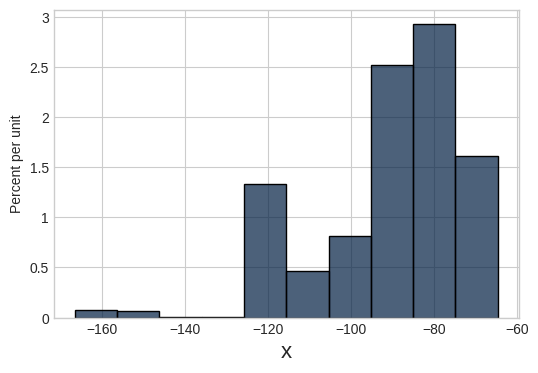

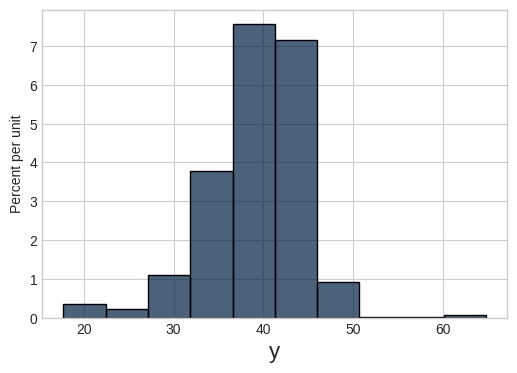

In [4]:
farmers_markets.select('x').hist()
farmers_markets.select('y').hist()

This gives us some indication of the physical locations of the markets, but what if we want to know about states? That is not a numeric value in that column, so we get an error in the following cell.

In [5]:
# THIS CELL WILL GIVE AN ERROR WHEN YOU RUN IT
farmers_markets.select('State').hist()

ValueError: ignored

# Creating Your Histogram Class
At the end of this lab, we'll show you how to do this very quickly using aggregates in the datascience module, but we want to **give you practice writing your own histogram class.**

California


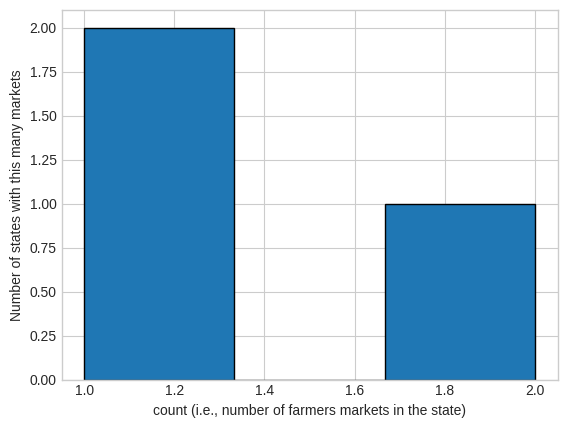

In [12]:
class Histogram():
    def __init__(self):
        self.dictionary = {}
        self.labels = []
        self.frequency = []

    # TODO: Given a list of non_numeric values
    # update the histogram's dictionary where the keys are all the unique values
    # in the non_numeric values and the corresponding values is
    # the number of times it appears
    #
    # Remember that, whenever you see a new key (i.e., one that isn't in the
    # dictionary yet), its initial value is 1 because seeing it for the first
    # time means it appears at least once in the list
    #
    # For example, given the list ["California", "Michigan", "Maine", "California"]
    # The dictionary will have a key for each state. Michigan and Maine would
    # have value 1 and California would have value 2.
    def update_dictionary(self, non_numeric):
        for ele in non_numeric:
          if ele in self.dictionary:
            self.dictionary[ele]+=1
          else:
            self.dictionary[ele]=1

    # TODO: Set the histogram's self.labels to its dictionary's keys
    def update_labels(self):
        self.labels = self.dictionary.keys()

    # TODO: Set the histogram's self.frequency to its dictionary's values
    def update_frequency(self):
        self.frequency = self.dictionary.values()

    # This method can be used to plot the histogram
    # You do not need to change it
    def draw(self):
        _ = plt.hist(self.frequency, bins='auto')
        plt.xlabel('count (i.e., number of farmers markets in the state)')
        plt.ylabel('Number of states with this many markets')
        plt.show()

    # TODO: Return the key from the dictionary that has the greatest value
    def get_mostfrequent(self):
        if not self.dictionary:
          return None
        return max(self.dictionary, key = self.dictionary.get)


hist = Histogram()
data = ["California", "Michigan", "Maine", "California"]
hist.update_dictionary(data)
hist.update_labels()
hist.update_frequency()
print(hist.get_mostfrequent())
hist.draw()

# Creating Histogram of Market States
Now you will **create your own histogram of farmers markets in each state.** First instantiate a histogram object. Then consider what data you need to pass from the farmers' markets table to update the dictionary.

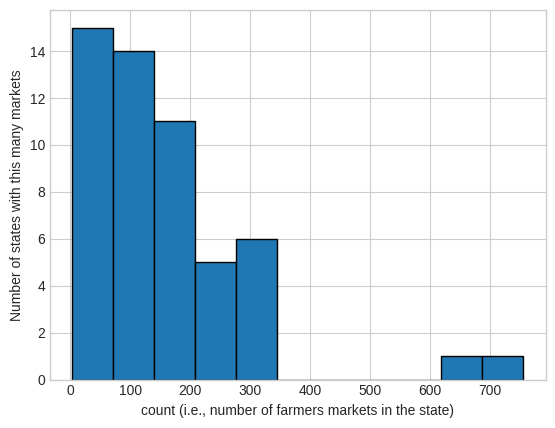

<bound method Histogram.get_mostfrequent of <__main__.Histogram object at 0x7e0acec3bee0>>


In [13]:
# Test your code!
# 1. TODO: Instantiate a Histogram object
hist = Histogram()

# 2. Update its dictionary by passing the State column from the
#    farmer's market table i.e. farmers_markets.column('State')
hist.update_dictionary(farmers_markets.column('State'))

# 3. TODO: Update the frequency of your Histogram object

hist.update_frequency()

# 4. TODO: Update the labels of your Histogram object

hist.update_labels()

# 5. TODO: Draw your Histogram object

hist.draw()

# 6. TODO: Print out the state with the most farmers' markets using
#    the get_mostfrequent method of your Histogram object

print(hist.get_mostfrequent)

assert(hist.get_mostfrequent() == 'California')
assert(len(hist.dictionary) == len(hist.labels) == len(hist.frequency) == 53)

## The Beauty of the Data Science Modules
Everything we just did is just a line or two of Python using aggregation using `group`. Please run this cell to see the exact same result.

State,count
California,755
New York,672
Michigan,340
Ohio,326
Illinois,323
Massachusetts,316
Wisconsin,307
Pennsylvania,294
Missouri,258
Virginia,253


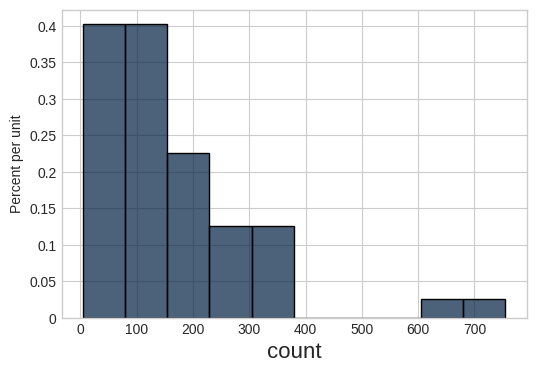

In [7]:
# Group the farmers market table by state and create a histogram of the counts
# per state
farmers_markets.group('State').select('count').hist()

# Show the farmers market table by state with counts in descending order
# of counts
farmers_markets.group('State').sort('count', descending=True)

### (Optional) Reflections
Add a text cell below to answer the following questions:
1. What do you feel more confident about after completing this lab?
2. What do you feel you can use more help with after completing this lab?
3. Do you have any constructive suggestions on how we can help you or improve this lab?

### Save your work to GitHub
Please save this notebook to your lab repository.